In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from __future__ import unicode_literals
from sklearn.metrics import accuracy_score


Bad key "text.kerning_factor" on line 4 in
C:\Users\aksha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load dataset
df = sm.datasets.fair.load_pandas().data

# Add 'affair' column: 1 rpresents having affair, 0 doesn't
df['affair'] = (df.affairs > 0).astype(int)

In [3]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [4]:
df.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [5]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [6]:
X = df.drop(columns=['affair'])
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
y = df['affair']
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 21)

In [9]:
log_model = LogisticRegression()
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
log_model.fit(x_train, y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
log_model.score(x_train, y_train)

0.9757630161579892

In [12]:
y_pred = log_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [13]:
accuracy_score(y_test, y_pred)

0.9785340314136126

In [14]:
import pickle
pickle.dump(log_model, open('logistic_base.pkl','wb'))

In [15]:
model = pickle.load(open('logistic_base.pkl','rb'))
model.score(x_test, y_test)

0.9785340314136126

## Let's do hyperparameter tuning fo Logistic Regression

In [16]:
from sklearn.model_selection import GridSearchCV
grid_params = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'C': [100, 10, 1, 0.1, 0.01],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'max_iter': [10,20,50,100,150],
              }

In [17]:
grid_search = GridSearchCV(estimator=log_model, param_grid= grid_params, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   37.0s finished
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'max_iter': [10, 20, 50, 100, 150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', r

In [18]:
grid_search.best_params_

{'C': 100, 'max_iter': 50, 'penalty': 'none', 'solver': 'newton-cg'}

In [19]:
log_model_1 = LogisticRegression(C = 100, max_iter = 50, penalty ='none', solver = 'newton-cg')
log_model_1

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
log_model_1.fit(x_train, y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
log_model_1.score(x_train, y_train)

1.0

In [22]:
y_pred = log_model_1.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred)

1.0

In [24]:
pickle.dump(log_model_1, open('final_model.pkl', 'wb'))

In [25]:
from pandas_profiling import ProfileReport

In [26]:
ProfileReport(pd.concat([X, pd.DataFrame(y)], axis=1)).to_widgets()

In [27]:
pd.concat([X, pd.DataFrame(y)], axis=1)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [28]:
type(X)

pandas.core.frame.DataFrame

In [29]:
type(pd.DataFrame(y))

pandas.core.frame.DataFrame

In [30]:
print(type(y_test), type(y_pred))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [31]:
compare = y_test.copy()

In [32]:
compare = pd.DataFrame(compare)
compare

,affair
148,1
4691,0
3094,0
754,1
3347,0
...,...
5127,0
3765,0
4635,0
3130,0


In [33]:
compare['affair_pred'] = y_pred
compare

,affair,affair_pred
148,1,1
4691,0,0
3094,0,0
754,1,1
3347,0,0
...,...,...
5127,0,0
3765,0,0
4635,0,0
3130,0,0


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

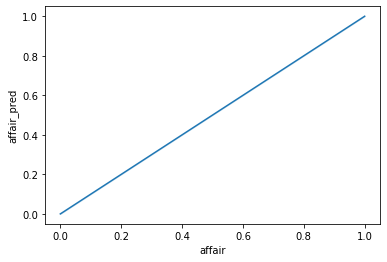

In [35]:
sns.lineplot(x = compare['affair'], y = compare['affair_pred'])

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, y_pred)

array([[1286,    0],
       [   0,  624]], dtype=int64)

In [40]:
log_model_1.predict([[3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769]])

array([1])